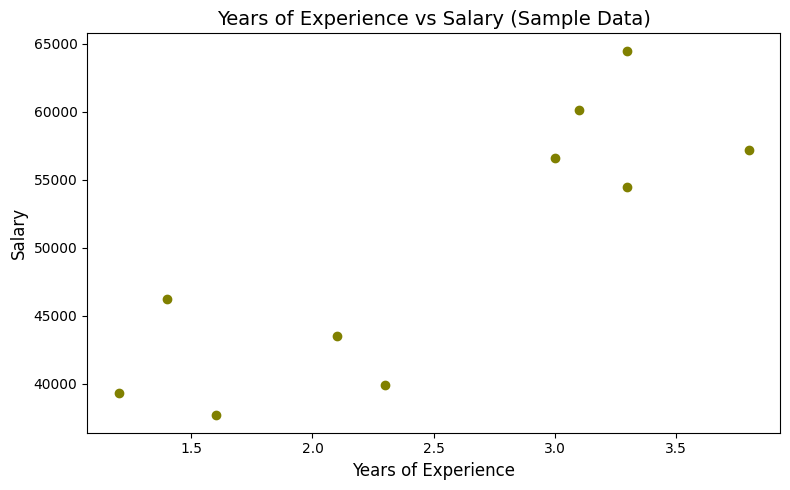

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)


# Load the sample data
sample_df = pd.read_csv("C:/sample salary dataset.csv")


# Plotting the sample data
plt.figure(figsize=(8, 5)) 

# Scatter plot
plt.scatter(sample_df['Years of Experience'], sample_df['Salary'], color='olive')

# Add title and axis labels
plt.title('Years of Experience vs Salary (Sample Data)', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)


# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
# Prepare features and target
X = sample_df[["Years of Experience"]]
y = sample_df["Salary"]

# Fit linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Predict using the model
sample_df["Predicted Salary"] = model.predict(X)
sample_df["Residual"] = sample_df["Salary"] - sample_df["Predicted Salary"]


model.intercept_, model.coef_[0]

(27315.804646815326, 9020.635598878354)

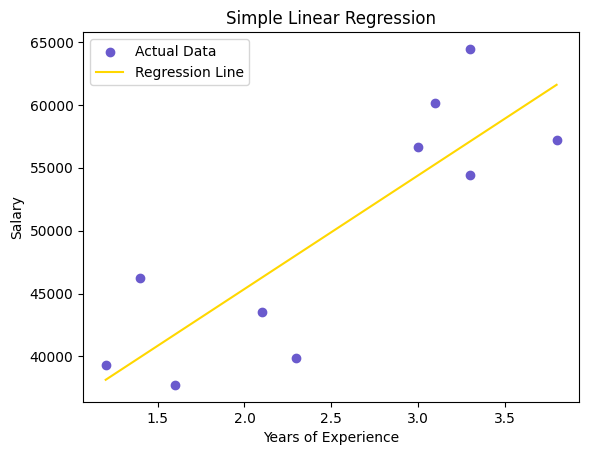

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare features and target
X = sample_df[["Years of Experience"]]
y = sample_df["Salary"]

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, color="slateblue", label="Actual Data")
plt.plot(X, model.predict(X), color="gold", label="Regression Line")
plt.title("Simple Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


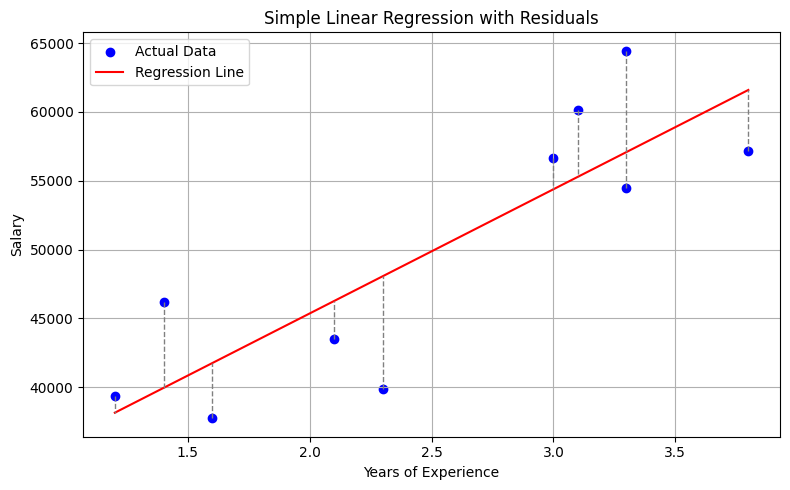

In [4]:
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = sample_df[["Years of Experience"]]
y = sample_df["Salary"]

# Fit model
model = LinearRegression().fit(X, y)

# Predict
sample_df["Predicted Salary"] = model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, sample_df["Predicted Salary"], color="red", label="Regression Line")

# Add residual lines
for i in range(len(sample_df)):
    plt.plot(
        [X.iloc[i, 0], X.iloc[i, 0]],
        [y.iloc[i], sample_df["Predicted Salary"].iloc[i]],
        color="gray", linestyle="--", linewidth=1
    )

plt.title("Simple Linear Regression with Residuals")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


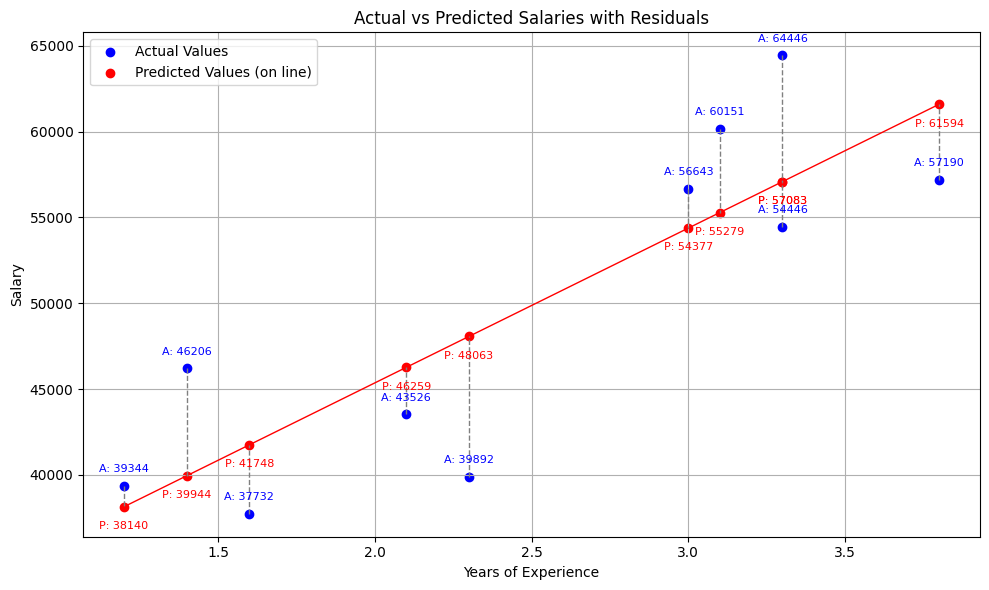

In [5]:
# Prepare features and target
X = sample_df[["Years of Experience"]]
y = sample_df["Salary"]

# Fit model
model = LinearRegression().fit(X, y)
sample_df["Predicted Salary"] = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Values")
plt.scatter(X, sample_df["Predicted Salary"], color="red", label="Predicted Values (on line)")
plt.plot(X, sample_df["Predicted Salary"], color="red", linewidth=1)

# Residual lines and optional annotations
for i in range(len(sample_df)):
    # Residual line
    plt.plot(
        [X.iloc[i, 0], X.iloc[i, 0]],
        [y.iloc[i], sample_df["Predicted Salary"].iloc[i]],
        color="gray", linestyle="--", linewidth=1
    )
    # Optional text labels
    plt.text(X.iloc[i, 0], y.iloc[i] + 800, f"A: {int(y.iloc[i])}", color="blue", fontsize=8, ha='center')
    plt.text(X.iloc[i, 0], sample_df["Predicted Salary"].iloc[i] - 1300,
             f"P: {int(sample_df['Predicted Salary'].iloc[i])}", color="red", fontsize=8, ha='center')

plt.title("Actual vs Predicted Salaries with Residuals")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


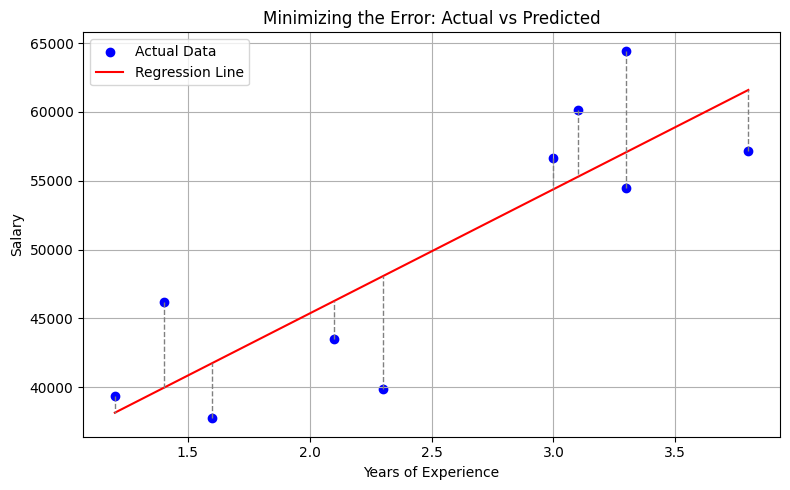

In [6]:
# Prepare features and target
X = sample_df[["Years of Experience"]]
y = sample_df["Salary"]

# Fit the model
model = LinearRegression().fit(X, y)
sample_df["Predicted Salary"] = model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, sample_df["Predicted Salary"], color="red", label="Regression Line")

# Residual lines (gray dashed)
for i in range(len(sample_df)):
    plt.plot(
        [X.iloc[i, 0], X.iloc[i, 0]],
        [y.iloc[i], sample_df["Predicted Salary"].iloc[i]],
        color="gray", linestyle="--", linewidth=1
    )

plt.title("Minimizing the Error: Actual vs Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Add predicted values and residuals to sample_df
sample_df["Predicted Salary"] = model.predict(X).round(2)
sample_df["Residual"] = (sample_df["Salary"] - sample_df["Predicted Salary"]).round(2)

# View the table
sample_df[["Years of Experience", "Salary", "Predicted Salary", "Residual"]]

,Years of Experience,Salary,Predicted Salary,Residual
0,1.2,39344,38140.57,1203.43
1,1.4,46206,39944.69,6261.31
2,1.6,37732,41748.82,-4016.82
3,2.1,43526,46259.14,-2733.14
4,2.3,39892,48063.27,-8171.27
5,3.0,56643,54377.71,2265.29
6,3.1,60151,55279.78,4871.22
7,3.3,54446,57083.90,-2637.90
8,3.3,64446,57083.90,7362.10
9,3.8,57190,61594.22,-4404.22


In [2]:
sample_df 

,Years of Experience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [3]:
# Set parameters
b0 = 0
b1 = 7000

# Compute predictions and loss
sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
sample_df['squared_error'] = sample_df['residual'] ** 2

# Compute total loss
total_loss = sample_df['squared_error'].sum()

total_loss

10760586918.0

In [4]:
sample_df

,Years of Experience,Salary,y_pred,residual,squared_error
0,1.2,39344,8400.0,30944.0,9.575311e+08
1,1.4,46206,9800.0,36406.0,1.325397e+09
2,1.6,37732,11200.0,26532.0,7.039470e+08
3,2.1,43526,14700.0,28826.0,8.309383e+08
4,2.3,39892,16100.0,23792.0,5.660593e+08
5,3.0,56643,21000.0,35643.0,1.270423e+09
6,3.1,60151,21700.0,38451.0,1.478479e+09
7,3.3,54446,23100.0,31346.0,9.825717e+08
8,3.3,64446,23100.0,41346.0,1.709492e+09
9,3.8,57190,26600.0,30590.0,9.357481e+08


In [6]:
# Set parameters
b0 = 0
b1 = 9000

# Compute predictions and loss
sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
sample_df['squared_error'] = sample_df['residual'] ** 2

# Compute total loss
total_loss = sample_df['squared_error'].sum()

total_loss

7730301718.0

In [7]:
# Set parameters
b0 = 20000
b1 = 9000

# Compute predictions and loss
sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
sample_df['squared_error'] = sample_df['residual'] ** 2

# Compute total loss
total_loss = sample_df['squared_error'].sum()

total_loss

783261718.0

In [8]:
# List of slope values to test
slope_values = [7500, 8000, 8500, 9000, 9500, 10000, 11000, 12000]

# Intercept
b0 = 0

# Dictionary to store total losses for each slope
loss_results = {}

# Loop through each slope and calculate total squared loss
for b1 in slope_values:
    sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
    sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
    sample_df['squared_error'] = sample_df['residual'] ** 2
    total_loss = sample_df['squared_error'].sum()
    loss_results[b1] = total_loss

# Display the results
for slope, loss in loss_results.items():
    print(f"Slope: {slope}, Sum of Squared Residuals: {loss:.2f}")


Slope: 7500, Sum of Squared Residuals: 9950148118.00
Slope: 8000, Sum of Squared Residuals: 9174954318.00
Slope: 8500, Sum of Squared Residuals: 8435005518.00
Slope: 9000, Sum of Squared Residuals: 7730301718.00
Slope: 9500, Sum of Squared Residuals: 7060842918.00
Slope: 10000, Sum of Squared Residuals: 6426629118.00
Slope: 11000, Sum of Squared Residuals: 5263936518.00
Slope: 12000, Sum of Squared Residuals: 4242223918.00


In [9]:
sample_df

,Years of Experience,Salary,y_pred,residual,squared_error
0,1.2,39344,14400.0,24944.0,622203136.0
1,1.4,46206,16800.0,29406.0,864712836.0
2,1.6,37732,19200.0,18532.0,343435024.0
3,2.1,43526,25200.0,18326.0,335842276.0
4,2.3,39892,27600.0,12292.0,151093264.0
5,3.0,56643,36000.0,20643.0,426133449.0
6,3.1,60151,37200.0,22951.0,526748401.0
7,3.3,54446,39600.0,14846.0,220403716.0
8,3.3,64446,39600.0,24846.0,617323716.0
9,3.8,57190,45600.0,11590.0,134328100.0


In [10]:
# Create the data
data = {
    "Slope": [7500, 8000, 8500, 9000, 9500, 10000, 11000, 12000],
    "Sum of Squared Residuals": [
        9950148118.00,
        9174954318.00,
        8435005518.00,
        7730301718.00,
        7060842918.00,
        6426629118.00,
        5263936518.00,
        4242223918.00
    ]
}

# Create DataFrame
loss_df = pd.DataFrame(data)

# Display the DataFrame
print(loss_df)


   Slope  Sum of Squared Residuals
0   7500              9.950148e+09
1   8000              9.174954e+09
2   8500              8.435006e+09
3   9000              7.730302e+09
4   9500              7.060843e+09
5  10000              6.426629e+09
6  11000              5.263937e+09
7  12000              4.242224e+09


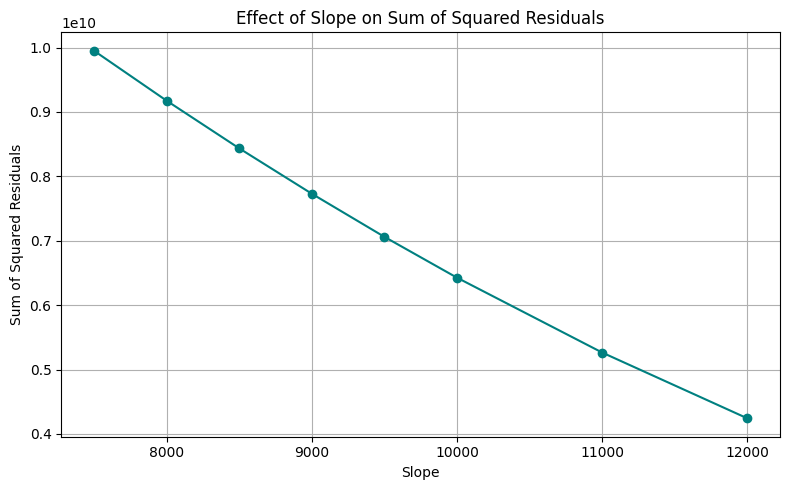

In [11]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(loss_df['Slope'], loss_df['Sum of Squared Residuals'], marker='o', linestyle='-', color='teal')
plt.title('Effect of Slope on Sum of Squared Residuals')
plt.xlabel('Slope')
plt.ylabel('Sum of Squared Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

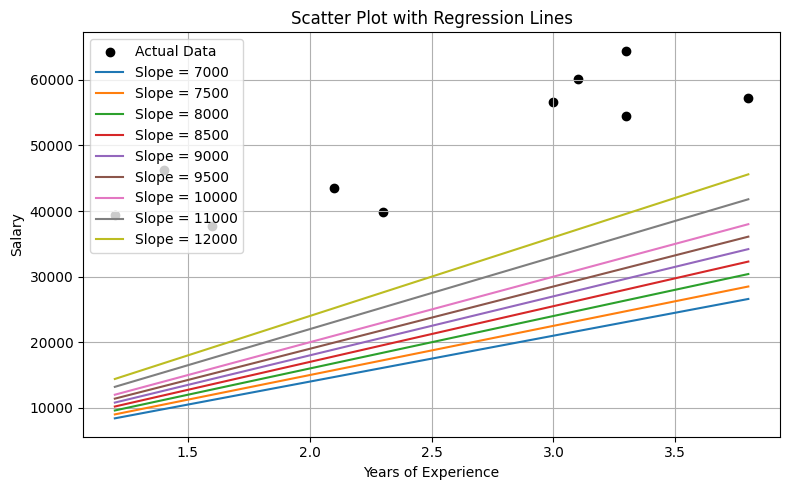

In [14]:
import numpy as np
# Slope values to visualize
slope_values = [7000, 7500, 8000, 8500, 9000, 9500, 10000, 11000, 12000]
b0 = 0  # Intercept

# Plot scatter
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['Years of Experience'], sample_df['Salary'], color='black', label='Actual Data')

# Overlay regression lines
x_vals = np.linspace(sample_df['Years of Experience'].min(), sample_df['Years of Experience'].max(), 100)
for b1 in slope_values:
    y_vals = b0 + b1 * x_vals
    plt.plot(x_vals, y_vals, label=f"Slope = {b1}")

# Formatting
plt.title("Scatter Plot with Regression Lines")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# Fixed slope and intercept
b1 = 8500
b0 = 20000

# Compute predictions and loss
sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
sample_df['squared_error'] = sample_df['residual'] ** 2

# Total loss
total_loss = sample_df['squared_error'].sum()


total_loss

985965518.0

In [3]:
sample_df

,Years of Experience,Salary,y_pred,residual,squared_error
0,1.2,39344,30200.0,9144.0,83612736.0
1,1.4,46206,31900.0,14306.0,204661636.0
2,1.6,37732,33600.0,4132.0,17073424.0
3,2.1,43526,37850.0,5676.0,32216976.0
4,2.3,39892,39550.0,342.0,116964.0
5,3.0,56643,45500.0,11143.0,124166449.0
6,3.1,60151,46350.0,13801.0,190467601.0
7,3.3,54446,48050.0,6396.0,40908816.0
8,3.3,64446,48050.0,16396.0,268828816.0
9,3.8,57190,52300.0,4890.0,23912100.0


In [4]:
# Set slope and intercept
b1 = 8500
b0 = 20000

# Compute predicted salaries
sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']

# Calculate residuals and squared errors
sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
sample_df['squared_error'] = sample_df['residual'] ** 2

# Optional: Remove the index (S.No) for cleaner display
sample_df_clean = sample_df.reset_index(drop=True)

# Total loss (sum of squared errors)
total_loss = sample_df['squared_error'].sum()
total_loss

985965518.0

In [6]:
sample_df_clean

,Years of Experience,Salary,y_pred,residual,squared_error
0,1.2,39344,30200.0,9144.0,83612736.0
1,1.4,46206,31900.0,14306.0,204661636.0
2,1.6,37732,33600.0,4132.0,17073424.0
3,2.1,43526,37850.0,5676.0,32216976.0
4,2.3,39892,39550.0,342.0,116964.0
5,3.0,56643,45500.0,11143.0,124166449.0
6,3.1,60151,46350.0,13801.0,190467601.0
7,3.3,54446,48050.0,6396.0,40908816.0
8,3.3,64446,48050.0,16396.0,268828816.0
9,3.8,57190,52300.0,4890.0,23912100.0


In [7]:
# List of intercept values to test
intercept_values = [20000, 25000, 28000, 30000, 34000, 38000, 40000]

# Fixed slope
b1 = 8500

# Dictionary to store total losses for each intercept
intercept_loss_results = {}

# Loop through each intercept and calculate total squared loss
for b0 in intercept_values:
    sample_df['y_pred'] = b0 + b1 * sample_df['Years of Experience']
    sample_df['residual'] = sample_df['Salary'] - sample_df['y_pred']
    sample_df['squared_error'] = sample_df['residual'] ** 2
    total_loss = sample_df['squared_error'].sum()
    intercept_loss_results[b0] = total_loss

# Display the results
for intercept, loss in intercept_loss_results.items():
    print(f"Intercept: {intercept}, Sum of Squared Residuals: {loss:.2f}")


Intercept: 20000, Sum of Squared Residuals: 985965518.00
Intercept: 25000, Sum of Squared Residuals: 373705518.00
Intercept: 28000, Sum of Squared Residuals: 246349518.00
Intercept: 30000, Sum of Squared Residuals: 261445518.00
Intercept: 34000, Sum of Squared Residuals: 531637518.00
Intercept: 38000, Sum of Squared Residuals: 1121829518.00
Intercept: 40000, Sum of Squared Residuals: 1536925518.00


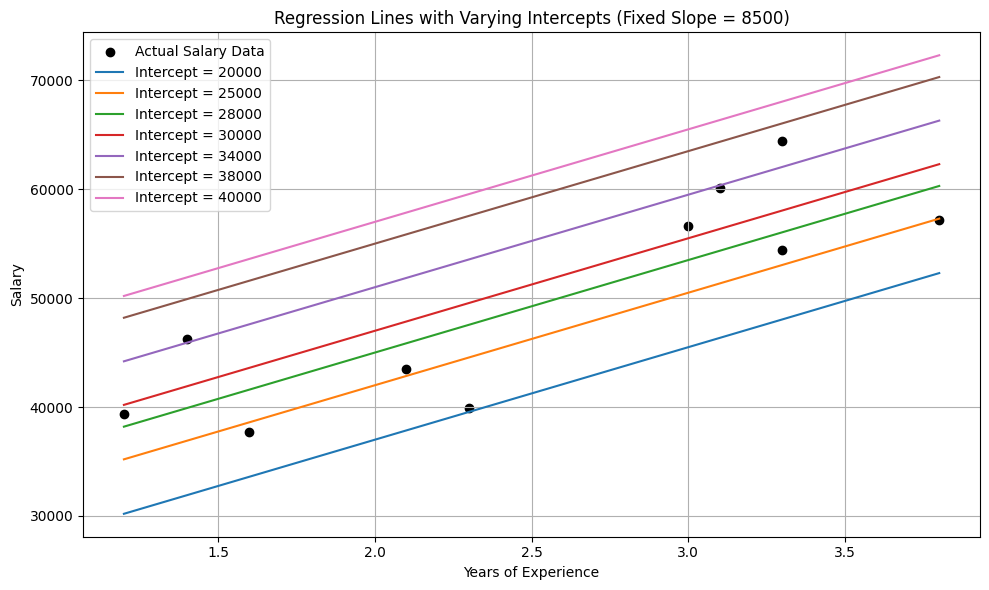

In [8]:
# Fixed slope value
slope_value = 8500

# List of intercept values to test
intercept_values = [20000, 25000, 28000, 30000, 34000, 38000, 40000]

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(sample_df['Years of Experience'], sample_df['Salary'], color='black', label='Actual Salary Data')

# Plot regression lines with different intercepts
for intercept in intercept_values:
    predicted_salary = intercept + slope_value * sample_df['Years of Experience']
    plt.plot(sample_df['Years of Experience'], predicted_salary, label=f'Intercept = {intercept}')

# Labels, legend, and plot setup
plt.title("Regression Lines with Varying Intercepts (Fixed Slope = 8500)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


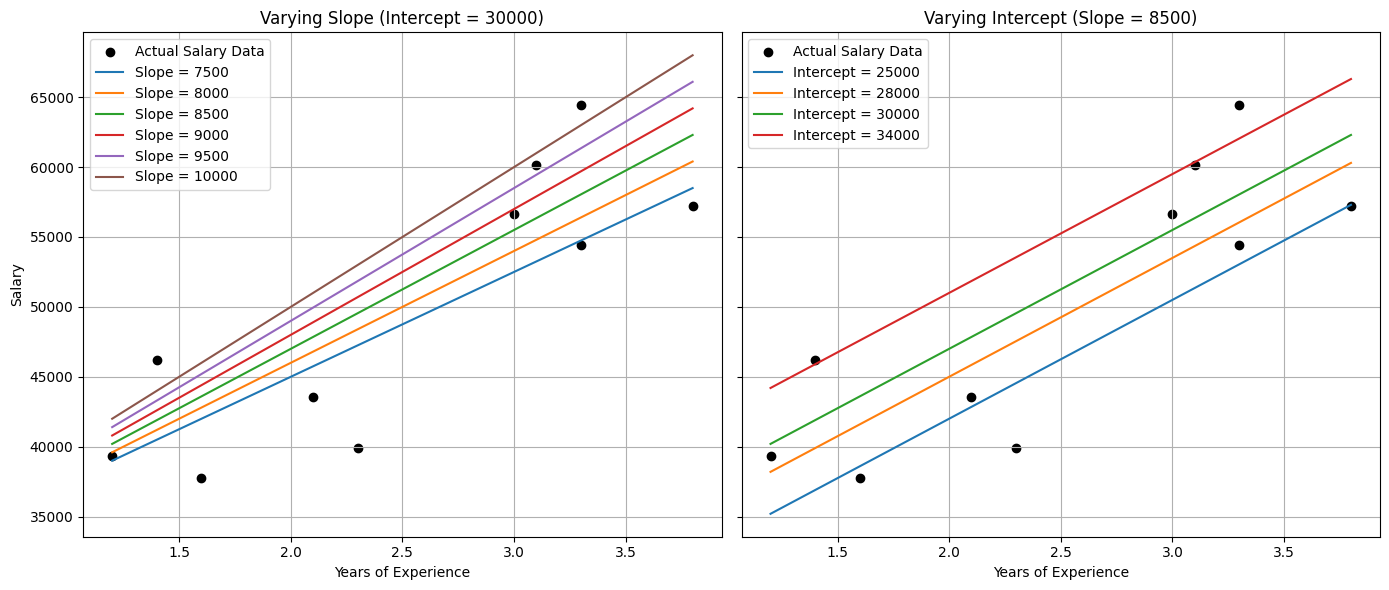

In [9]:
years_exp = sample_df['Years of Experience']
salary = sample_df['Salary']

# Slope and intercept values
slope_values = [7500, 8000, 8500, 9000, 9500, 10000]
intercept_values = [25000, 28000, 30000, 34000]

# Fixed values
fixed_intercept = 30000
fixed_slope = 8500

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: slope variation
axes[0].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for slope in slope_values:
    predicted = fixed_intercept + slope * years_exp
    axes[0].plot(years_exp, predicted, label=f'Slope = {slope}')
axes[0].set_title("Varying Slope (Intercept = 30000)")
axes[0].set_xlabel("Years of Experience")
axes[0].set_ylabel("Salary")
axes[0].legend()
axes[0].grid(True)

# Right: intercept variation
axes[1].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for intercept in intercept_values:
    predicted = intercept + fixed_slope * years_exp
    axes[1].plot(years_exp, predicted, label=f'Intercept = {intercept}')
axes[1].set_title("Varying Intercept (Slope = 8500)")
axes[1].set_xlabel("Years of Experience")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


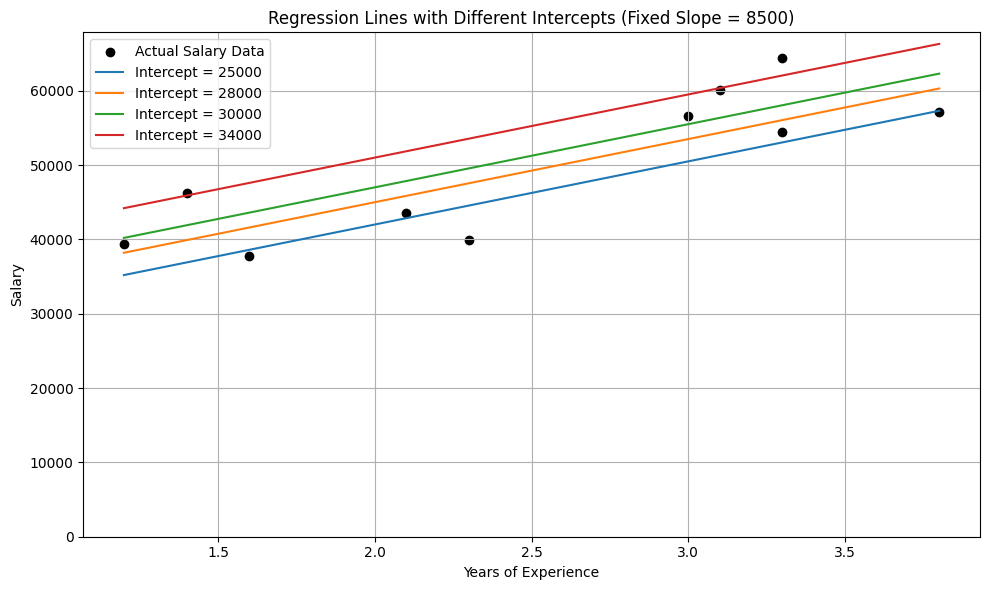

In [10]:
# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(sample_df['Years of Experience'], sample_df['Salary'], color='black', label='Actual Salary Data')

# Plot regression lines with different intercepts
for intercept in intercept_values:
    predicted_salary = intercept + slope_value * sample_df['Years of Experience']
    plt.plot(sample_df['Years of Experience'], predicted_salary, label=f'Intercept = {intercept}')

# Labels and setup
plt.title("Regression Lines with Different Intercepts (Fixed Slope = 8500)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.ylim(bottom=0)  # <-- this forces the y-axis to start from 0
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


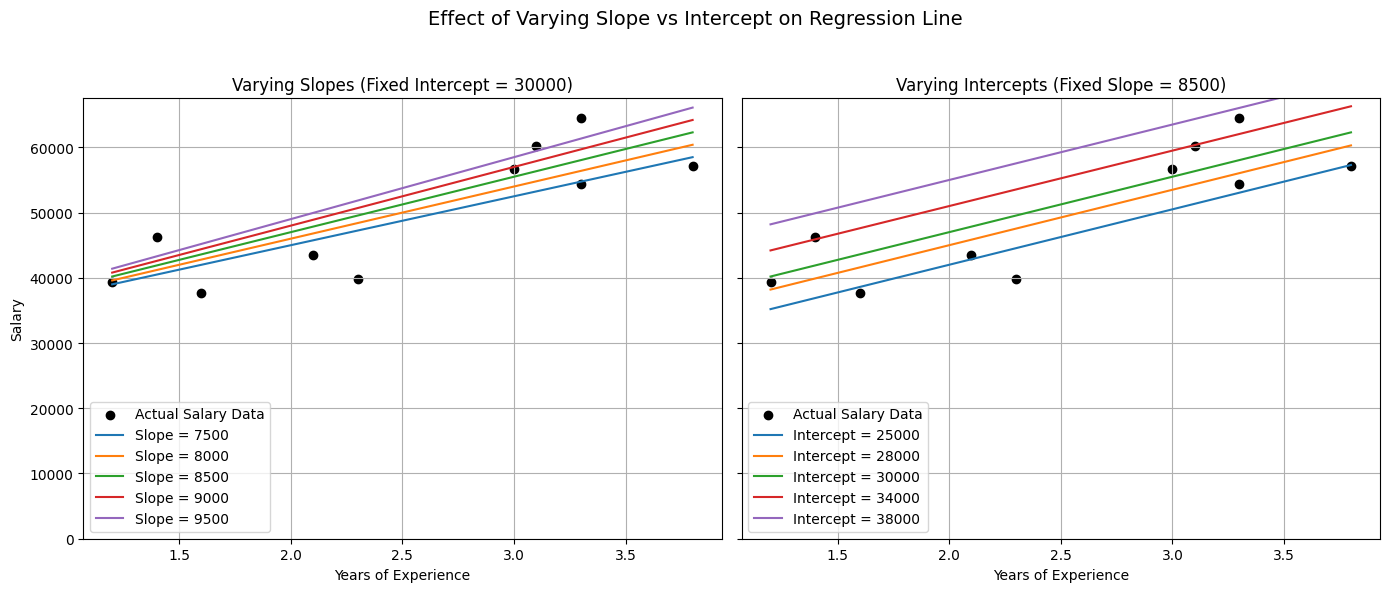

In [11]:
# Data
years_exp = sample_df['Years of Experience']
salary = sample_df['Salary']

# Slope and intercept values
slope_values = [7500, 8000, 8500, 9000, 9500]
intercept_values = [25000, 28000, 30000, 34000, 38000]

# Fixed values
fixed_intercept = 30000
fixed_slope = 8500

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#  Left Plot: Varying Slope 
axes[0].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for slope in slope_values:
    predicted = fixed_intercept + slope * years_exp
    axes[0].plot(years_exp, predicted, label=f'Slope = {slope}')
axes[0].set_title("Varying Slopes (Fixed Intercept = 30000)")
axes[0].set_xlabel("Years of Experience")
axes[0].set_ylabel("Salary")
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(bottom=0)

#  Right Plot: Varying Intercept 
axes[1].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for intercept in intercept_values:
    predicted = intercept + fixed_slope * years_exp
    axes[1].plot(years_exp, predicted, label=f'Intercept = {intercept}')
axes[1].set_title("Varying Intercepts (Fixed Slope = 8500)")
axes[1].set_xlabel("Years of Experience")
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(bottom=0)

plt.suptitle("Effect of Varying Slope vs Intercept on Regression Line", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


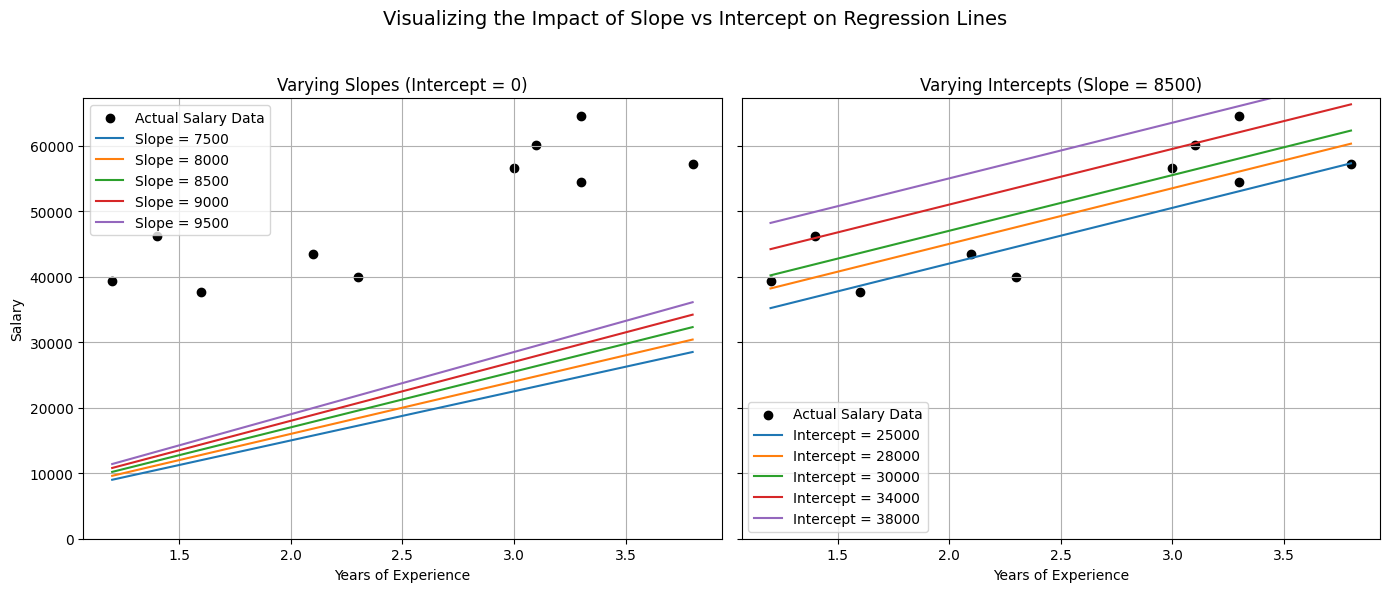

In [13]:
# Data
years_exp = sample_df['Years of Experience']
salary = sample_df['Salary']

# Values for slope and intercept testing
slope_values = [7500, 8000, 8500, 9000, 9500]
intercept_values = [25000, 28000, 30000, 34000, 38000]

# Fixed values for each plot
fixed_intercept_for_slope_plot = 0  # used while varying slope
fixed_slope_for_intercept_plot = 8500   # used while varying intercept

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot 1: Varying Slopes (Fixed Intercept) ---
axes[0].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for slope in slope_values:
    predicted_salary = fixed_intercept_for_slope_plot + slope * years_exp
    axes[0].plot(years_exp, predicted_salary, label=f'Slope = {slope}')
axes[0].set_title("Varying Slopes (Intercept = 0)")
axes[0].set_xlabel("Years of Experience")
axes[0].set_ylabel("Salary")
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(bottom=0)

# --- Plot 2: Varying Intercepts (Fixed Slope) ---
axes[1].scatter(years_exp, salary, color='black', label='Actual Salary Data')
for intercept in intercept_values:
    predicted_salary = intercept + fixed_slope_for_intercept_plot * years_exp
    axes[1].plot(years_exp, predicted_salary, label=f'Intercept = {intercept}')
axes[1].set_title("Varying Intercepts (Slope = 8500)")
axes[1].set_xlabel("Years of Experience")
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(bottom=0)

# Shared title and layout
plt.suptitle("Visualizing the Impact of Slope vs Intercept on Regression Lines", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
# Given slope and intercept
b0 = 30000
b1 = 9000

# Calculate predicted salaries
sample_df['Predicted_Salary'] = b0 + b1 * sample_df['Years of Experience']

# Calculate residuals (errors)
sample_df['Residual'] = sample_df['Salary'] - sample_df['Predicted_Salary']

# Calculate squared errors
sample_df['Squared_Error'] = sample_df['Residual'] ** 2

# Display the DataFrame with new columns
print(sample_df)



   Years of Experience  Salary  Predicted_Salary  Residual  Squared_Error
0                  1.2   39344           40800.0   -1456.0      2119936.0
1                  1.4   46206           42600.0    3606.0     13003236.0
2                  1.6   37732           44400.0   -6668.0     44462224.0
3                  2.1   43526           48900.0   -5374.0     28879876.0
4                  2.3   39892           50700.0  -10808.0    116812864.0
5                  3.0   56643           57000.0    -357.0       127449.0
6                  3.1   60151           57900.0    2251.0      5067001.0
7                  3.3   54446           59700.0   -5254.0     27604516.0
8                  3.3   64446           59700.0    4746.0     22524516.0
9                  3.8   57190           64200.0   -7010.0     49140100.0


In [16]:
# List of slope and intercept pairs
pairs = [
    (25000, 6000), (25000, 8500), (25000, 11000),
    (30000, 7000), (30000, 9000),
    (35000, 6000), (35000, 8500), (35000, 11000),
    (40000, 7500), (40000, 10000)
]

# Store results in a list
results = []

for intercept, slope in pairs:
    predicted = intercept + slope * sample_df['Years of Experience']
    residuals = sample_df['Salary'] - predicted
    ssr = (residuals ** 2).sum()
    results.append({
        'Intercept': intercept,
        'Slope': slope,
        'Sum of Squared Residuals': ssr
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)


   Intercept  Slope  Sum of Squared Residuals
0      25000   6000              1.288400e+09
1      25000   8500              3.737055e+08
2      25000  11000              3.401365e+08
3      30000   7000              3.280269e+08
4      30000   9000              3.097417e+08
5      35000   6000              3.088795e+08
6      35000   8500              6.491855e+08
7      35000  11000              1.870617e+09
8      40000   7500              1.044068e+09
9      40000  10000              2.540549e+09


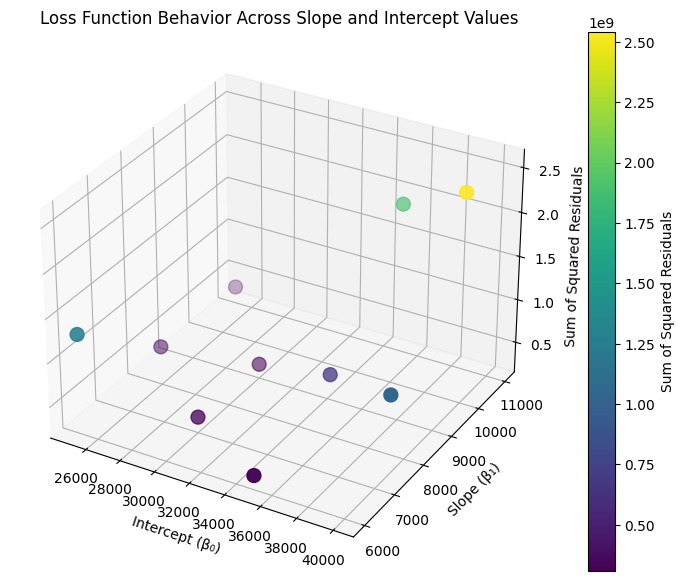

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Your data points with SSR values
data_points = [
    (25000, 6000, 1288400000),
    (25000, 8500, 373705518),
    (25000, 11000, 340136518),
    (30000, 7000, 328026869),
    (30000, 9000, 309741718),
    (35000, 6000, 308879500),
    (35000, 8500, 649185514),
    (35000, 11000, 1870617000),
    (40000, 7500, 1044068000),
    (40000, 10000, 2540549000),
]

# Split data into separate lists
intercepts = [point[0] for point in data_points]
slopes = [point[1] for point in data_points]
ssr_values = [point[2] for point in data_points]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(intercepts, slopes, ssr_values, c=ssr_values, cmap='viridis', s=100)
ax.set_xlabel('Intercept (β₀)')
ax.set_ylabel('Slope (β₁)')
ax.set_zlabel('Sum of Squared Residuals')
ax.set_title('Loss Function Behavior Across Slope and Intercept Values')

fig.colorbar(scat, label='Sum of Squared Residuals')

plt.show()


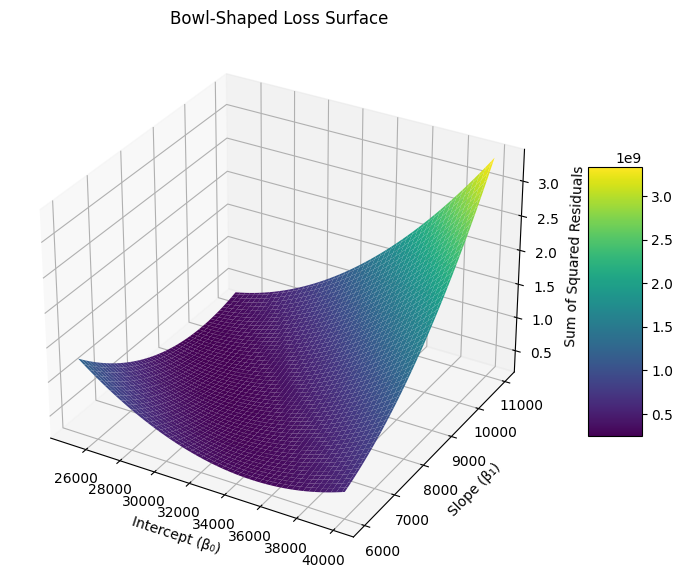

In [18]:
# Assuming sample_df is your DataFrame with 'Years of Experience' and 'Salary'
X = sample_df['Years of Experience']
y = sample_df['Salary']

# Define range for intercept and slope
intercept_range = np.linspace(25000, 40000, 100)
slope_range = np.linspace(6000, 11000, 100)

# Create meshgrid
B0, B1 = np.meshgrid(intercept_range, slope_range)
SSR = np.zeros_like(B0)

# Calculate sum of squared residuals for each pair (b0, b1)
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        y_pred = B0[i, j] + B1[i, j] * X
        residuals = y - y_pred
        SSR[i, j] = np.sum(residuals ** 2)

# Plot the 3D bowl surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B0, B1, SSR, cmap='viridis', edgecolor='none')
ax.set_xlabel('Intercept (β₀)')
ax.set_ylabel('Slope (β₁)')
ax.set_zlabel('Sum of Squared Residuals')
ax.set_title('Bowl-Shaped Loss Surface')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
